## Observations and Insights 

    Based on the mice study data provided for this analysis, Capomulin and Ramicane displayed encouraging results as a cancer treatment in mice.  As can be seen in the Summary Statistics table below, Capomulin and Ramicane resulted in the lowest mean and median values for the tumor volume among all the treatment regimens and were substantially lower than the other drug regimens and placebo included in this study.  Although, as can be seen from the bar plot of the studied mice, Capomulin and Ramicane were the drug regimens performed on the two highest quantities of mice, so it may be worth further study on whether the additional mice used in those two regimens had any effect on the lowered tumor volume reported for those regimens.
    Also based on the mice study data, Capomulin can be seen to have caused a significant decrease in the tumor volume for mouse 'l509'.  As can be seen in the line plot below titled 'Capomulin treatment of mouse l509'.  Capomulin reduced the tumor volume by over 5 mm3 over the course of approximately 30 days.  This is just one mouse but an example of the effectiveness of the drug regimen.
    And finally, based on the mice study data, there is a clear positive correlation between average weight of the mice on the drug regimen Capomulin and the volume of their tumors.  As can be seen in the scatter plot 'Average Mouse Weight versus Average Tumor Volume for the Capomulin Regimen'.


In [298]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='inner', on=['Mouse ID'])
                          
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [299]:
# Check the number of mice.
mice = mouse_study_df['Mouse ID'].unique()
len(mice)

249

In [300]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
bad_mouse = duplicates_df['Mouse ID'].unique()[0]

In [301]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [302]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != bad_mouse, :]

In [303]:
# Check the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [ ]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [304]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'] )
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

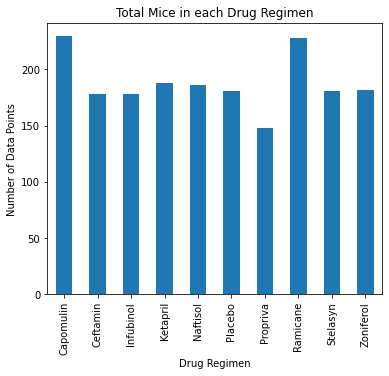

In [305]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
regimen_group = clean_df.groupby('Drug Regimen')
mice_count = regimen_group['Mouse ID'].count()

plt.title("Total Mice in each Drug Regimen")
plt.ylabel('Number of Data Points')
mice_count.plot(kind='bar', figsize=(6,5))
plt.show()


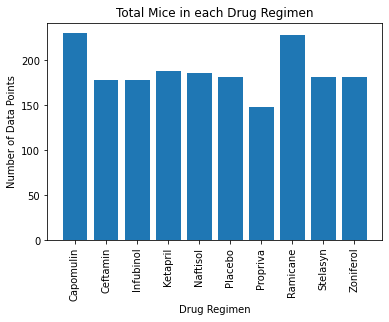

In [306]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas
x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice_count,   align='center')
plt.xticks(tick_locations, s.index, rotation='vertical')
plt.title("Total Mice in each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
# plt.figure(figsize=(6,5))
# plt.xlim(-1, len(x_axis))
# plt.ylim(0, max(mice_count + 10))
plt.show()


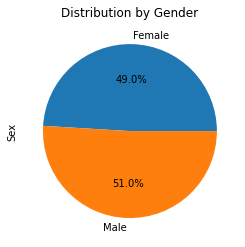

In [309]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot
gender_group = clean_df.groupby('Sex')
gender = gender_group['Sex'].count()

gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution by Gender')
plt.show()


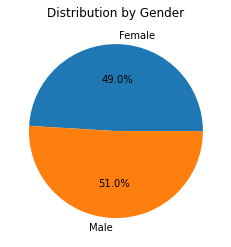

In [310]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas
labels = ['Female', 'Male']
plt.pie(gender, labels=labels, autopct='%1.1f%%')

plt.title('Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [311]:
# Filter rows to drug regimens of interest
focused_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') 
                       | (clean_df['Drug Regimen'] == 'Ramicane') 
                       | (clean_df['Drug Regimen'] == 'Infubinol') 
                       | (clean_df['Drug Regimen'] == 'Ceftamin'), :]
focused_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [312]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
mouse_group = focused_df.groupby('Mouse ID')
mice_latest_timepoint = mouse_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_latest_df = pd.merge(focused_df, mice_latest_timepoint, how='inner', on=['Mouse ID','Timepoint'])
mice_latest_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [313]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    volumes = mice_latest_df.loc[mice_latest_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol.append(volumes)
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    print(f'Drug Regimen: {drug}  IQR: {iqr}  Outliers:  {len(outliers)}')


Drug Regimen: Capomulin  IQR: 7.781863460000004  Outliers:  0
Drug Regimen: Ramicane  IQR: 9.098536719999998  Outliers:  0
Drug Regimen: Infubinol  IQR: 11.477135160000003  Outliers:  1
Drug Regimen: Ceftamin  IQR: 15.577752179999997  Outliers:  0


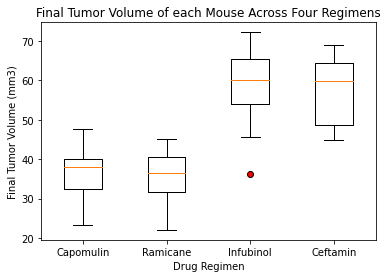

In [314]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markerfacecolor='red')
plt.boxplot(tumor_vol, labels=drugs, flierprops=flierprops)
plt.title('Final Tumor Volume of each Mouse Across Four Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [315]:
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
cap_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [316]:
l509_df = clean_df.loc[clean_df['Mouse ID'] == 'l509', :]
l509_tumor_df = l509_df[['Tumor Volume (mm3)', 'Timepoint']]
l509_tumor_df

,Tumor Volume (mm3),Timepoint
371,45.000000,0
372,45.851193,5
373,46.759074,10
374,47.488599,15
375,48.070452,20
376,44.006257,25
377,44.708055,30
378,40.207289,35
379,40.770813,40
380,41.483008,45


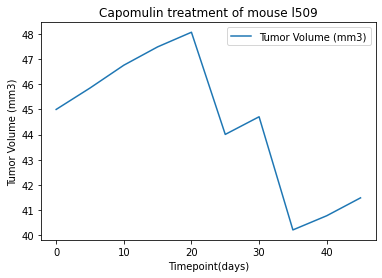

In [317]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
l509_tumor_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [318]:
cap_mice_group = cap_df.groupby('Mouse ID')
mouse_avg = cap_mice_group[['Weight (g)','Tumor Volume (mm3)']].mean()
mousey_df = mouse_avg.rename(columns={'Weight (g)': 'Average Weight (g)',
                                     'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
mousey_df

,Average Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


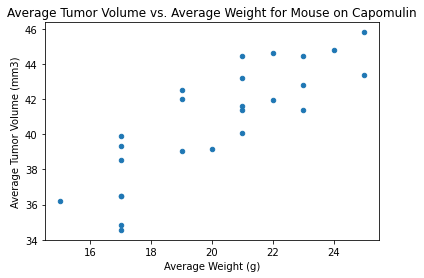

In [319]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
mousey_df.plot(kind='scatter', x='Average Weight (g)', y='Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Weight for Mouse on Capomulin')
plt.show()

## Correlation and Regression

In [320]:
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(mousey_df['Average Weight (g)'], 
                                                                mousey_df['Average Tumor Volume (mm3)'])
cap_fit = cap_slope * mousey_df['Average Weight (g)'] + cap_int

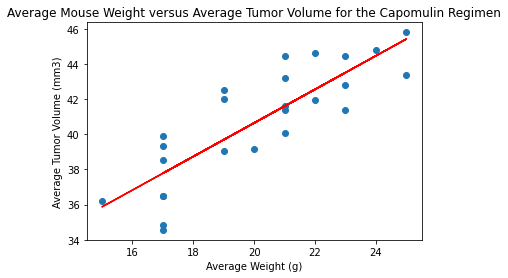

In [321]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
plt.scatter(mousey_df['Average Weight (g)'], mousey_df['Average Tumor Volume (mm3)'])
plt.plot(mousey_df['Average Weight (g)'], cap_fit, color='r')
plt.title('Average Mouse Weight versus Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [322]:
correlation = st.pearsonr(mousey_df['Average Weight (g)'], mousey_df['Average Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
